In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import get_data
import statsmodels
from simulate import cholesky
from simulate import simulatedata
from simulate import simulate_multiple_time_series

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
syms = ['BTCUSDT']
freq = '10min'
start_date = '2020-01-01'
end_date = '2020-01-03'

In [4]:
raw_data = get_data.get_data(syms, freq, start_date, end_date)
raw_data

BTCUSDT_2019-12-26.json
Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=695704595703-kho1v4q5lhtoqq268ckb4it0n08facat.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.
BTCUSDT_2020-01-02.json


C:\Users\user\Documents\GitHub\TradingBot\get_data.py:52: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  data[symbol] = _fit_data_to_df(data[symbol], frequency)[start_time:end_time]


{'BTCUSDT':                               open     high      low    close      volume  \
 time                                                                        
 2020-01-01 00:00:00+00:00  7195.24  7196.25  7178.20  7191.07  154.874358   
 2020-01-01 00:10:00+00:00  7193.15  7193.53  7177.35  7178.29   80.261439   
 2020-01-01 00:20:00+00:00  7177.71  7185.56  7175.47  7178.45   96.049725   
 2020-01-01 00:30:00+00:00  7178.19  7185.44  7176.23  7177.53   59.973326   
 2020-01-01 00:40:00+00:00  7177.14  7182.99  7176.34  7182.94   44.872982   
 ...                            ...      ...      ...      ...         ...   
 2020-01-02 23:20:00+00:00  6959.16  6962.39  6950.00  6962.34  217.262815   
 2020-01-02 23:30:00+00:00  6962.47  6974.75  6957.66  6965.37  145.757951   
 2020-01-02 23:40:00+00:00  6965.09  6969.46  6959.87  6967.41   75.157310   
 2020-01-02 23:50:00+00:00  6967.40  6968.82  6961.24  6965.71   82.459841   
 2020-01-03 00:00:00+00:00  6965.49  6965.71  6948.45

In [62]:
dt

time     open     high      low    close
0   2020-01-01 00:00:00+00:00  7195.24  7196.25  7178.20  7191.07
1   2020-01-01 00:10:00+00:00  7193.15  7193.53  7177.35  7178.29
2   2020-01-01 00:20:00+00:00  7177.71  7185.56  7175.47  7178.45
3   2020-01-01 00:30:00+00:00  7178.19  7185.44  7176.23  7177.53
4   2020-01-01 00:40:00+00:00  7177.14  7182.99  7176.34  7182.94
..                        ...      ...      ...      ...      ...
284 2020-01-02 23:20:00+00:00  6959.16  6962.39  6950.00  6962.34
285 2020-01-02 23:30:00+00:00  6962.47  6974.75  6957.66  6965.37
286 2020-01-02 23:40:00+00:00  6965.09  6969.46  6959.87  6967.41
287 2020-01-02 23:50:00+00:00  6967.40  6968.82  6961.24  6965.71
288 2020-01-03 00:00:00+00:00  6965.49  6965.71  6948.45  6963.38

[289 rows x 5 columns]

In [59]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [100]:
varmax = VARMAX(dt1, order = (0,1))

In [102]:
params = varmax.fit(return_params=True)
params

array([-1.18880288e-04, -1.21012422e-04, -3.85045835e-01,  3.06049127e-03,
        8.76273782e-01,  3.67354401e-03, -1.50726841e-03,  5.16874961e-04,
        1.68595030e-03])

In [76]:
dir(varmax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_clone_from_init_kwds',
 '_data_attr',
 '_final_exog',
 '_final_trend',
 '_fit_collinear',
 '_fit_zeros',
 '_fixed_params',
 '_fixed_params_index',
 '_forecasts_error_partial_derivatives',
 '_formula_max_endog',
 '_free_params_index',
 '_get_exog_names',
 '_get_extension_time_varying_matrices',
 '_get_index_label_loc',
 '_get_index_loc',
 '_get_index_with_final_state',
 '_get_init_kwds',
 '_get_prediction_index',
 '_handle_data',
 '_has_fixed_params',
 '_hessian_complex_step',
 '_hessian_finite_difference',
 '_hessian_oim',
 '_hessian_opg',
 '_hessian_param_defaults',
 '_

In [112]:
varmax.simulate(params, len(dt1))

open     close
time                                         
2020-01-01 00:00:00+00:00  0.001064  0.004048
2020-01-01 00:10:00+00:00 -0.001429  0.003106
2020-01-01 00:20:00+00:00 -0.002110 -0.001739
2020-01-01 00:30:00+00:00  0.001962 -0.002545
2020-01-01 00:40:00+00:00 -0.000831 -0.001819
...                             ...       ...
2020-01-02 23:20:00+00:00  0.001228  0.000759
2020-01-02 23:30:00+00:00 -0.003780  0.000669
2020-01-02 23:40:00+00:00  0.000507 -0.000556
2020-01-02 23:50:00+00:00  0.002015 -0.001486
2020-01-03 00:00:00+00:00 -0.001418  0.002757

[289 rows x 2 columns]

In [114]:
dt1

open     close
time                                         
2020-01-01 00:00:00+00:00       NaN       NaN
2020-01-01 00:10:00+00:00 -0.000290 -0.001777
2020-01-01 00:20:00+00:00 -0.002146  0.000022
2020-01-01 00:30:00+00:00  0.000067 -0.000128
2020-01-01 00:40:00+00:00 -0.000146  0.000754
...                             ...       ...
2020-01-02 23:20:00+00:00 -0.001664  0.000457
2020-01-02 23:30:00+00:00  0.000476  0.000435
2020-01-02 23:40:00+00:00  0.000376  0.000293
2020-01-02 23:50:00+00:00  0.000332 -0.000244
2020-01-03 00:00:00+00:00 -0.000274 -0.000334

[289 rows x 2 columns]

# Stage 0

In [63]:
dt = raw_data['BTCUSDT'][['open', 'high', 'low','close']].copy()
dt

open     high      low    close
time                                                         
2020-01-01 00:00:00+00:00  7195.24  7196.25  7178.20  7191.07
2020-01-01 00:10:00+00:00  7193.15  7193.53  7177.35  7178.29
2020-01-01 00:20:00+00:00  7177.71  7185.56  7175.47  7178.45
2020-01-01 00:30:00+00:00  7178.19  7185.44  7176.23  7177.53
2020-01-01 00:40:00+00:00  7177.14  7182.99  7176.34  7182.94
...                            ...      ...      ...      ...
2020-01-02 23:20:00+00:00  6959.16  6962.39  6950.00  6962.34
2020-01-02 23:30:00+00:00  6962.47  6974.75  6957.66  6965.37
2020-01-02 23:40:00+00:00  6965.09  6969.46  6959.87  6967.41
2020-01-02 23:50:00+00:00  6967.40  6968.82  6961.24  6965.71
2020-01-03 00:00:00+00:00  6965.49  6965.71  6948.45  6963.38

[289 rows x 4 columns]

In [12]:
order_close, seasonal_order_close = simulatedata.get_order(dt['close'])

In [14]:
if sum(seasonal_order_close) == 1: seasonal_order_close = (0, 0, 0, 0)
model_params_close = simulatedata.fit_sarima(dt['close'], order_close, seasonal_order_close)

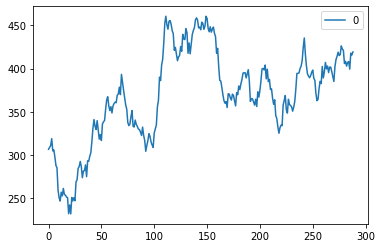

In [30]:
simulatedata.simulate_sarima(dt['close'], order_close, seasonal_order_close, model_params_close, len(dt), 1).plot()

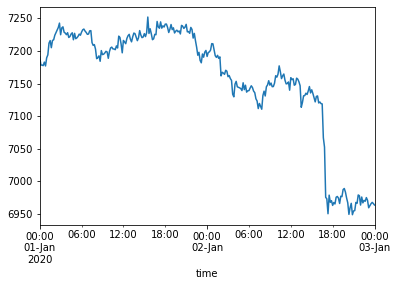

In [20]:
dt['close'].plot()

# Stage 1

In [66]:
dt1 = pd.DataFrame()
dt1['open'] = dt['open'].pct_change()
dt1['close'] = dt['close'].pct_change()
dt1 

open     close
time                                         
2020-01-01 00:00:00+00:00       NaN       NaN
2020-01-01 00:10:00+00:00 -0.000290 -0.001777
2020-01-01 00:20:00+00:00 -0.002146  0.000022
2020-01-01 00:30:00+00:00  0.000067 -0.000128
2020-01-01 00:40:00+00:00 -0.000146  0.000754
...                             ...       ...
2020-01-02 23:20:00+00:00 -0.001664  0.000457
2020-01-02 23:30:00+00:00  0.000476  0.000435
2020-01-02 23:40:00+00:00  0.000376  0.000293
2020-01-02 23:50:00+00:00  0.000332 -0.000244
2020-01-03 00:00:00+00:00 -0.000274 -0.000334

[289 rows x 2 columns]

In [7]:
std_close = simulate_multiple_time_series.compute_std(dt1['close'])
mean_close = dt1['close'].mean()
std_open = simulate_multiple_time_series.compute_std(dt1['open'])
mean_open = dt1['open'].mean()

cov_open_close = dt1.cov()
cov = cov_open_close.iloc[0, 1]
corr = cov / (std_close*std_open)

mean_close, std_close, mean_open, std_open, cov, corr, cov_open_close

(-0.00011071658288543273,
 0.0014098873357997598,
 -0.00011168703848396907,
 0.0014030332655430606,
 -1.8471211971044486e-07,
 -0.09337766601688922,
                open         close
 open   1.975361e-06 -1.847121e-07
 close -1.847121e-07  1.994708e-06)

# Stage 2

In [8]:
dt2 = pd.DataFrame()
dt2['open'] = (dt1['open'] - mean_open) / std_open
dt2['close'] = (dt1['close'] - mean_close) * 2*corr / std_close
dt2

open     close
time                                         
2020-01-01 00:00:00+00:00       NaN       NaN
2020-01-01 00:10:00+00:00 -0.127426  0.220745
2020-01-01 00:20:00+00:00 -1.450286 -0.017618
2020-01-01 00:30:00+00:00  0.127268  0.002311
2020-01-01 00:40:00+00:00 -0.024653 -0.114507
...                             ...       ...
2020-01-02 23:20:00+00:00 -1.106465 -0.075194
2020-01-02 23:30:00+00:00  0.418607 -0.072313
2020-01-02 23:40:00+00:00  0.347811 -0.053461
2020-01-02 23:50:00+00:00  0.315988  0.017654
2020-01-03 00:00:00+00:00 -0.115783  0.029642

[289 rows x 2 columns]

# Stage 3

In [9]:
dt3 = dt2.copy()
dt3['close'] = dt3['open'] - dt3['close']
dt3

open     close
time                                         
2020-01-01 00:00:00+00:00       NaN       NaN
2020-01-01 00:10:00+00:00 -0.127426 -0.348171
2020-01-01 00:20:00+00:00 -1.450286 -1.432668
2020-01-01 00:30:00+00:00  0.127268  0.124957
2020-01-01 00:40:00+00:00 -0.024653  0.089854
...                             ...       ...
2020-01-02 23:20:00+00:00 -1.106465 -1.031271
2020-01-02 23:30:00+00:00  0.418607  0.490919
2020-01-02 23:40:00+00:00  0.347811  0.401271
2020-01-02 23:50:00+00:00  0.315988  0.298334
2020-01-03 00:00:00+00:00 -0.115783 -0.145425

[289 rows x 2 columns]

# Stage 4

In [10]:
chol = np.linalg.cholesky(dt3.corr())
inverse_chol = np.linalg.inv(chol)

# Stage 5

In [11]:
dt5 = np.matmul(inverse_chol, dt3.T).T # or np.matmul(dt3, inverse_chol.T)
dt5.columns = ['open', 'close']
dt5

open     close
time                                         
2020-01-01 00:00:00+00:00       NaN       NaN
2020-01-01 00:10:00+00:00 -0.127426 -1.199174
2020-01-01 00:20:00+00:00 -1.450286 -0.041260
2020-01-01 00:30:00+00:00  0.127268 -0.000492
2020-01-01 00:40:00+00:00 -0.024653  0.613537
...                             ...       ...
2020-01-02 23:20:00+00:00 -1.106465  0.300644
2020-01-02 23:30:00+00:00  0.418607  0.428175
2020-01-02 23:40:00+00:00  0.347811  0.320144
2020-01-02 23:50:00+00:00  0.315988 -0.065313
2020-01-03 00:00:00+00:00 -0.115783 -0.170281

[289 rows x 2 columns]

# Stage 6

In [12]:
transform = dt5.copy()

In [13]:
order_close, seasonal_order_close = simulatedata.get_order(transform['close'][1:])
order_open, seasonal_order_open = simulatedata.get_order(transform['open'][1:])
order_close, seasonal_order_close, order_open, seasonal_order_open

((2, 0, 0), (0, 0, 0, 1), (2, 0, 0), (0, 0, 0, 1))

In [14]:
if sum(seasonal_order_close) == 1: seasonal_order_close = (0, 0, 0, 0)
model_params_close = simulatedata.fit_sarima(transform['close'][1:], order_close, seasonal_order_close)
if sum(seasonal_order_open) == 1: seasonal_order_open = (0, 0, 0, 0)
model_params_open = simulatedata.fit_sarima(transform['open'][1:], order_open, seasonal_order_open)

In [15]:
t_close = simulatedata.simulate_sarima(transform['close'][1:], order_close, seasonal_order_close, model_params_close, len(transform), 1)
t_open = simulatedata.simulate_sarima(transform['open'][1:], order_open, seasonal_order_open, model_params_open, len(transform), 1)
t_open, t_close

(            0
 0   -0.137662
 1    0.704559
 2   -0.470258
 3   -0.516564
 4   -0.576349
 ..        ...
 284 -0.026299
 285 -0.700252
 286  0.154434
 287 -0.130136
 288 -0.107519
 
 [289 rows x 1 columns],
             0
 0    1.171152
 1    0.271017
 2   -1.282887
 3    1.094195
 4   -0.017147
 ..        ...
 284  0.312110
 285  0.032312
 286  1.762012
 287 -0.601912
 288 -0.629714
 
 [289 rows x 1 columns])

# Stage 7

In [16]:
dt7 = np.concatenate([t_open, t_close], axis = 1)
dt7 = np.matmul(chol, dt7.T).T # or np.matmul(dt7, chol.T)
dt7 = pd.DataFrame(dt7)
dt7

0         1
0   -0.137662  0.082495
1    0.704559  0.742664
2   -0.470258 -0.700590
3   -0.516564 -0.304108
4   -0.576349 -0.569487
..        ...       ...
284 -0.026299  0.032192
285 -0.700252 -0.682033
286  0.154434  0.479359
287 -0.130136 -0.239782
288 -0.107519 -0.222729

[289 rows x 2 columns]

# Stage 8

In [17]:
dt8 = dt7.copy()
dt8.index = dt1.index
dt8.columns = ['open', 'close']
dt8['close'] = dt8['open'] - dt8['close']
dt8

open     close
time                                         
2020-01-01 00:00:00+00:00 -0.137662 -0.220157
2020-01-01 00:10:00+00:00  0.704559 -0.038105
2020-01-01 00:20:00+00:00 -0.470258  0.230332
2020-01-01 00:30:00+00:00 -0.516564 -0.212456
2020-01-01 00:40:00+00:00 -0.576349 -0.006862
...                             ...       ...
2020-01-02 23:20:00+00:00 -0.026299 -0.058490
2020-01-02 23:30:00+00:00 -0.700252 -0.018219
2020-01-02 23:40:00+00:00  0.154434 -0.324925
2020-01-02 23:50:00+00:00 -0.130136  0.109646
2020-01-03 00:00:00+00:00 -0.107519  0.115210

[289 rows x 2 columns]

# Stage 9

In [18]:
dt9 = dt8.copy()
dt9['open'] = dt9['open'] * std_open + mean_open
dt9['close'] = dt9['close'] * std_close / (2*corr) + mean_close
dt9

open     close
time                                         
2020-01-01 00:00:00+00:00 -0.000305  0.001551
2020-01-01 00:10:00+00:00  0.000877  0.000177
2020-01-01 00:20:00+00:00 -0.000771 -0.001850
2020-01-01 00:30:00+00:00 -0.000836  0.001493
2020-01-01 00:40:00+00:00 -0.000920 -0.000059
...                             ...       ...
2020-01-02 23:20:00+00:00 -0.000149  0.000331
2020-01-02 23:30:00+00:00 -0.001094  0.000027
2020-01-02 23:40:00+00:00  0.000105  0.002342
2020-01-02 23:50:00+00:00 -0.000294 -0.000938
2020-01-03 00:00:00+00:00 -0.000263 -0.000980

[289 rows x 2 columns]

In [19]:
dt9.cov()

open         close
open   2.306320e-06 -1.977011e-07
close -1.977011e-07  1.848650e-06

# Stage 10

In [20]:
simulated_price_data = pd.DataFrame()
simulated_price_data[0] = simulatedata.construct_price_series(dt9['open'], dt['open'][0], dt.index[0], freq)
simulated_price_data[1] = simulatedata.construct_price_series(dt9['close'], dt['close'][0], dt.index[0], freq)
simulated_price_data

0            1
2020-01-01 00:00:00+00:00  7195.240000  7191.070000
2020-01-01 00:10:00+00:00  7193.046666  7202.225757
2020-01-01 00:20:00+00:00  7199.353761  7203.500228
2020-01-01 00:30:00+00:00  7193.799639  7190.176787
2020-01-01 00:40:00+00:00  7187.782436  7200.913097
...                                ...          ...
2020-01-02 23:20:00+00:00  7110.245403  7137.369992
2020-01-02 23:30:00+00:00  7109.188928  7139.731391
2020-01-02 23:40:00+00:00  7101.410312  7139.922903
2020-01-02 23:50:00+00:00  7102.155886  7156.646480
2020-01-03 00:00:00+00:00  7100.065919  7149.930114

[289 rows x 2 columns]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


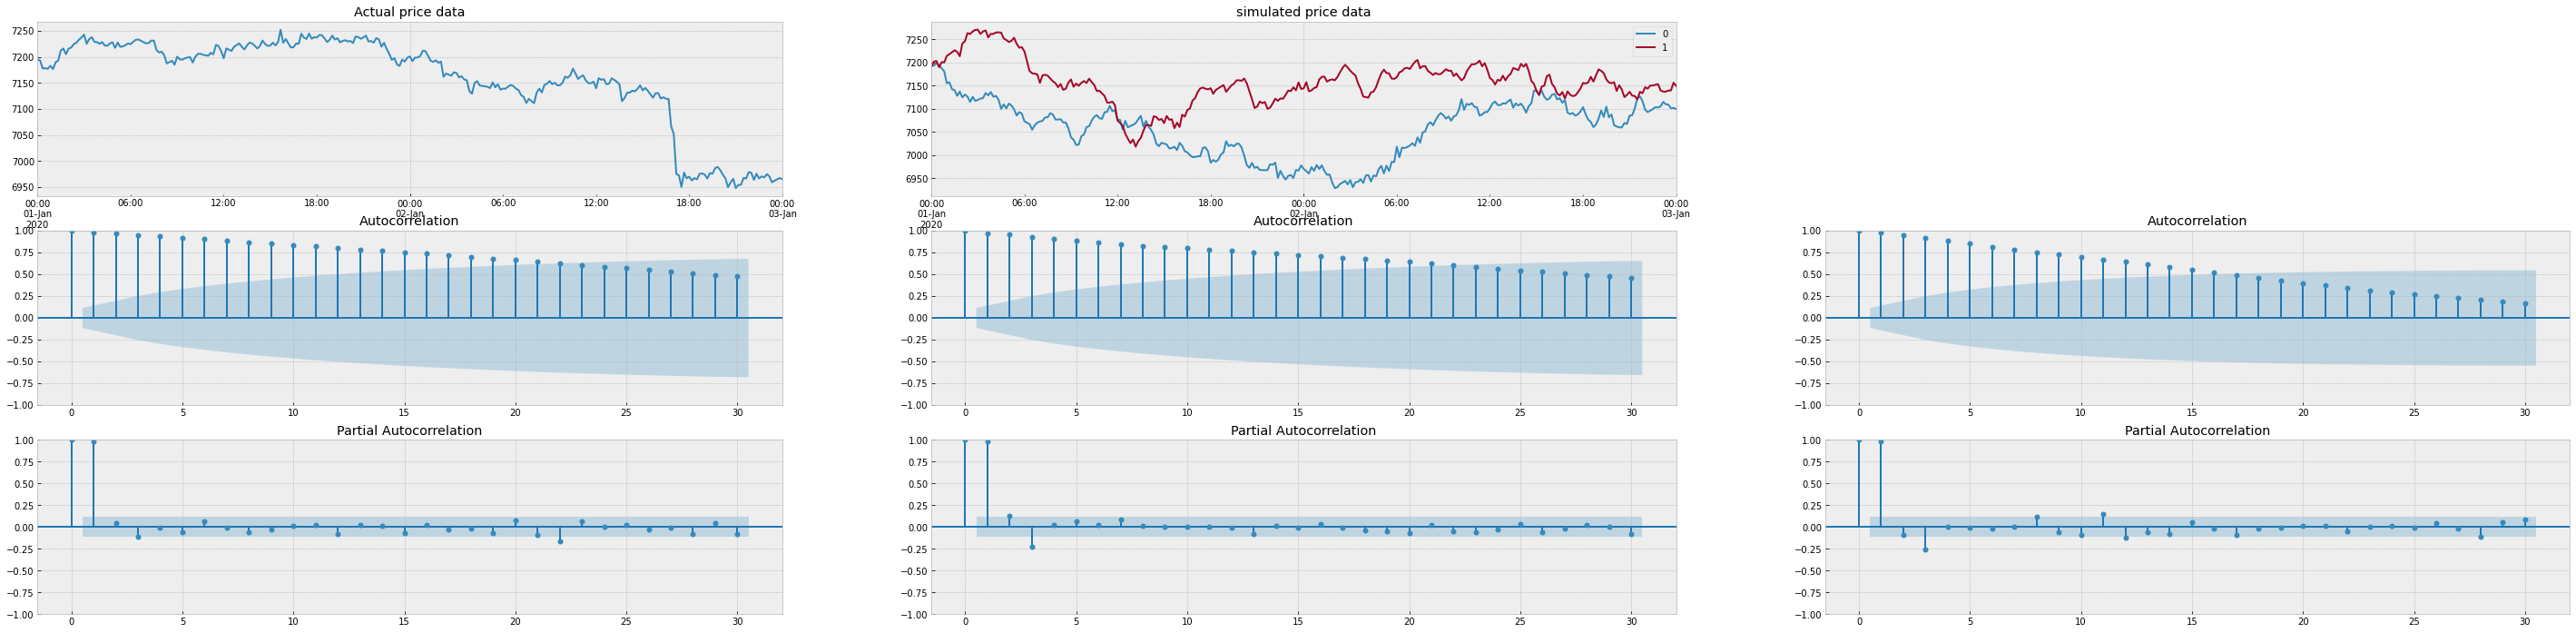

In [21]:
simulatedata.Evaluate_performance(dt['open'], simulated_price_data, lags=30)

# End

In [22]:
var_close = simulate_multiple_time_series.compute_std(dt1['close'])
mean_close = dt1['close'].mean()
var_open = simulate_multiple_time_series.compute_std(dt1['open'])
mean_open = dt1['open'].mean()


# dt1.corr bị thành null matrix nên lúc trước tôi để thành dt để test và dt thì nó hiển nhiên ko đúng but ko biết làm 
# thế nào để fix cho cái dt1 nó ko bị null mặc dù cho chạy thẳng hàm cholesky.cholesky2 thì cũng có đoạn tính corr dt1 mà nó ko bị null
cov_open_close = dt1.corr()
cov = cov_open_close[0][0] / var_close * var_open
cov, var_open

KeyError: 0

In [ ]:
data1 = []
data1 = np.append(data1, simulate_multiple_time_series.normalize_or_standardize_data(dt1['open'], is_normalize= False))
data2 = pd.DataFrame()
data2['close'] = dt1['close']-mean_close
for i in range(len(data2['close'])):
    data2['close'][i] = data2['close'][i] * 2 * cov_open_close[0][0] * var_open/var_close
data3 = pd.DataFrame()
data3['open'] = dt1['open']
data3['close'] = -data2['close']+ dt1['open']
chol = np.linalg.cholesky(data3.corr())
inverse_chol = np.linalg.inv(chol)
data1 = np.append(data1, data3['close'])
data1 = data1.reshape(2, len(dt1['close']))
data1 = np.matmul(inverse_chol, data1)
transform = pd.DataFrame(dt1).copy()
transform['close'] = data1[1]
transform['open'] = data1[0]
transform, simulate_multiple_time_series.compute_std(transform['close']),simulate_multiple_time_series.compute_std(transform['open'])

In [ ]:
transform_x_chol = pd.DataFrame()
transform_x_chol['close'] = t_close[0]
transform_x_chol['open'] = t_open[0]
array = []
array = np.append(array, transform_x_chol['open'])
array = np.append(array, transform_x_chol['close'])
array = array.reshape(2,len(transform_x_chol['open']))
transform_back = np.matmul(chol, array)
# simulate_corr_rets['close'] = simulate_corr_rets['open'] - simulate_corr_rets['close']
simulate = pd.DataFrame()
simulate['open'] =simulate_multiple_time_series.mulback_cholesky(transform_back[0],  False, mean_open, var_open)
simulate['close'] = simulate_multiple_time_series.mulback_cholesky(transform_back[0] -transform_back[1],  False, mean_close, var_close/(2*cov))
# simulate ['close'] = simulate['open']-simulate['close']
simulate
# transform_back = simulate_multiple_time_series.transform_back(transform_x_chol, chol, var_close/(2*cov), mean_close, var_open, mean_open)
# transform_back

In [ ]:
simulate.corr()

In [ ]:
dt1.corr()

In [ ]:
simulated_price_data = pd.DataFrame()
simulated_price_data[0] = simulatedata.construct_price_series(simulate['open'], dt['open'][0], dt.index[0], freq)
simulated_price_data[1] = simulatedata.construct_price_series(simulate['close'], dt['close'][0], dt.index[0], freq)
# for i in range(len(simulated_price_data[1])):
#     simulated_price_data[1][i]=simulated_price_data[1][i] * simulated_price_data[0][i]
simulated_price_data

In [ ]:
simulatedata.Evaluate_performance(dt['open'], simulated_price_data, lags=30)

In [ ]:
dt.plot()

In [ ]:
simulate_multiple_time_series.simulate_open_and_close(dt)

In [ ]:
# order, seasonal_order = simulatedata.get_order(dt['open'][1:])
# order, seasonal_order

In [ ]:
# if sum(seasonal_order) == 1: seasonal_order = (0, 0, 0, 0)
# model_params = simulatedata.fit_sarima(dt['open'][1:], order, seasonal_order)

In [ ]:
# t = simulatedata.simulate_sarima(dt['open'][1:], order, seasonal_order, model_params, len(dt), 10)
# t

In [ ]:
# simulated_price_data = simulatedata.construct_price_series(t, dt['close'][0], dt.index[0], freq)

In [ ]:
# simulatedata.Evaluate_performance(dt['close'], simulated_price_data, lags=30)